In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:20,.2f}'.format

## Country-level data

Load and pivot the country-level data set

In [21]:
countries_of_interest =['Singapore', 'Switzerland', 'Netherlands', 'Japan', 'France', 'United States', 'China',
                        'India', 'Brazil', 'Colombia', 'Indonesia', 'Senegal', 'Ghana']

In [22]:
people_df = pd.read_csv('data/model_one/people.csv', sep=';')
peoples_pivot_df = people_df.pivot_table(index='date', columns=['country', 'indicator'], values='value').drop_duplicates()

In [13]:
stacked_france_df = peoples_pivot_df[['France']].stack('country')

In [14]:
stacked_france_df.index = stacked_france_df.index.droplevel(1)
france_df = stacked_france_df.reset_index()
france_df['date'] = pd.to_datetime(france_df['date'], format='%Y-%m-%d')

In [15]:
sns.set_style("whitegrid")
sns.set_palette("colorblind")

In [16]:
indicator_variables = list(france_df.columns.get_values())
indicator_variables.remove('date')

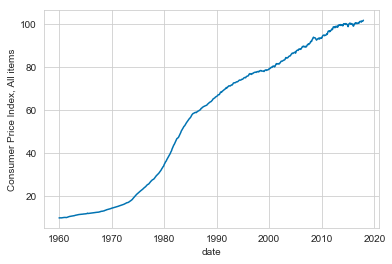

In [17]:
sns.lineplot(x='date', y='Consumer Price Index, All items', markers=True, data=france_df)

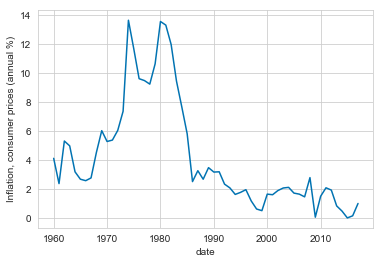

In [18]:
sns.lineplot(x='date', y='Inflation, consumer prices (annual %)', markers=True, data=france_df)

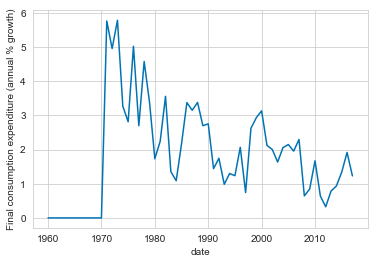

In [19]:
sns.lineplot(x='date', y='Final consumption expenditure (annual % growth)', markers=True, data=france_df)

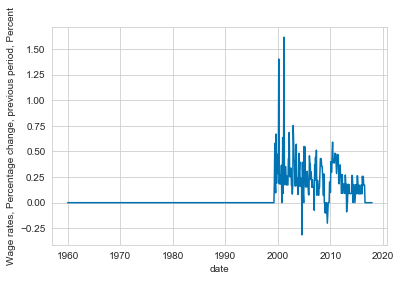

In [20]:
sns.lineplot(x='date', y='Wage rates, Percentage change, previous period, Percent', markers=True, data=france_df)

### Write labels to disk

In [34]:
label_index_df = (peoples_pivot_df.stack('country')['Inflation, consumer prices (annual %)'] / 100).unstack()
label_df = label_index_df.iloc[:, label_index_df.columns.get_level_values(0).isin(countries_of_interest)].interpolate()

In [35]:
label_df.head()

country,Brazil,China,Colombia,France,Ghana,India,Indonesia,Japan,Netherlands,Senegal,Singapore,Switzerland,United States
date,,,,,,,,,,,,,
1960-01-01,0.00,0.00,0.06,0.04,0.00,0.02,0.40,0.04,0.02,0.00,0.00,0.01,0.01
1960-02-01,0.00,0.00,0.06,0.04,0.00,0.02,0.37,0.04,0.02,0.00,0.00,0.01,0.01
1960-03-01,0.00,0.00,0.06,0.04,0.00,0.02,0.35,0.04,0.02,0.00,0.00,0.02,0.01
1960-04-01,0.00,0.00,0.06,0.04,0.00,0.02,0.33,0.04,0.02,0.00,0.00,0.02,0.01
1960-05-01,0.00,0.00,0.07,0.04,0.00,0.02,0.31,0.04,0.02,0.00,0.00,0.02,0.01


In [39]:
label_df.to_csv('features/m_one/labels_interpolated.csv', sep=';')